# CS4320 - Introduction to Machine Learning 

## Homework 2: Decision trees and machine learning fundamentals 

**Please type your name and A number here:**

In [1]:
Name = "Rylei Mindrum"
assert Name != "", 'Please enter your name in the above quotation marks, thanks!'

A_number = "A02352206"
assert A_number != "", 'Please enter your A-number in the above quotation marks, thanks!'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



## Introducing the data set
 
For this  assignment you'll be looking at Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/) dataset.
The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/get-audio-features). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it to the same directory as this notebook.

## Exercise 1: Exploratory data analysis

rubric={points:30}

#### 1(a) 
rubric={points:2}

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column of the .csv file should be set as the index.

In [3]:
# Insert your code here
import pandas as pd

spotify_df = pd.read_csv('spotify.csv', index_col=0)
print(spotify_df)






      acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0          0.01020         0.833       204600   0.434          0.021900    2   
1          0.19900         0.743       326933   0.359          0.006110    1   
2          0.03440         0.838       185707   0.412          0.000234    2   
3          0.60400         0.494       199413   0.338          0.510000    5   
4          0.18000         0.678       392893   0.561          0.512000    5   
...            ...           ...          ...     ...               ...  ...   
2012       0.00106         0.584       274404   0.932          0.002690    1   
2013       0.08770         0.894       182182   0.892          0.001670    1   
2014       0.00857         0.637       207200   0.935          0.003990    0   
2015       0.00164         0.557       185600   0.992          0.677000    1   
2016       0.00281         0.446       204520   0.915          0.000039    9   

      liveness  loudness  mode  speechi

#### 1(b)
rubric={points:2}

Run the following line of code to split the data. How many training and test examples do we have?

> Note: we are setting the `random_state` so that everyone has the same split on their assignments. This will make it easier for the TAs to grade.

In [4]:
# Do not modify this cell
df_train, df_test = train_test_split(spotify_df, test_size=0.25, random_state=123)

In [5]:
# Insert your code here (You need to print the number of training and testing examples)
print(f"Number of training examples: {df_train.shape[0]}")
print(f"Number of testing examples: {df_test.shape[0]}")


Number of training examples: 1512
Number of testing examples: 505


#### 1(c)
rubric={points:4}

- Print out the output of `describe()` **on the training split**. This will compute some summary statistics of the numeric columns.
- Which feature has the smallest range? 

> Hint: You can subtract the min value from the max value of the column to get the range.

Note that `describe` returns another DataFrame.

In [6]:
# Insert your code here
summary_stats = df_train.describe()
print(summary_stats)

# Calculate range for each feature
ranges = summary_stats.loc['max'] - summary_stats.loc['min']

       acousticness  danceability    duration_ms       energy  \
count   1512.000000   1512.000000    1512.000000  1512.000000   
mean       0.185337      0.617565  247606.240741     0.682022   
std        0.257866      0.163086   81841.143743     0.211498   
min        0.000005      0.122000   16042.000000     0.014800   
25%        0.009460      0.512000  200072.000000     0.564000   
50%        0.063700      0.629500  230100.000000     0.713500   
75%        0.253000      0.738250  274041.750000     0.847250   
max        0.995000      0.984000  849960.000000     0.997000   

       instrumentalness          key     liveness     loudness         mode  \
count       1512.000000  1512.000000  1512.000000  1512.000000  1512.000000   
mean           0.139041     5.406746     0.189816    -7.089587     0.619048   
std            0.279536     3.635880     0.154115     3.841885     0.485782   
min            0.000000     0.000000     0.018800   -33.097000     0.000000   
25%            0.00

In [7]:
# Insert your code here
feature_smallest_range = ranges.idxmin()
range_value = ranges.min()

print(f"\nThe feature with the smallest range is '{feature_smallest_range}' with a range of {range_value}.")



The feature with the smallest range is 'speechiness' with a range of 0.7928999999999999.


#### 1(d) 
rubric={points:12}

Let's focus on the following features:

- danceability
- tempo
- energy
- valence

For each of these features (in order), produce a histogram that shows the distribution of the feature values in the training set, **separated for positive and negative examples**. 
By "positive examples" we mean target = 1 (user liked the song, positive sentiment) and by "negative examples" we mean target = 0 (used disliked the song, negative sentiment). As an example, here is what the histogram would look like for a different feature, loudness  

<img src="https://docs.google.com/uc?export=download&id=1aVT9lfAE0b6ju1aV3_gG_Dj5ZR2EJ-ri" alt="drawing" width="400"/>:



(You don't have to match all the details exactly, such as colour, but your histograms should look something like this, with a reasonable number of bins to see the shape of the distribution.) As shown above, there are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram above shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of your loop, which draws the figure and resets the canvas for your next plot.

Here is some code that separates out the dataset into positive and negative examples, to help you get started:

In [8]:
# Do not modify the code  
negative_examples = df_train.query("target == 0")
positive_examples = df_train.query("target == 1")

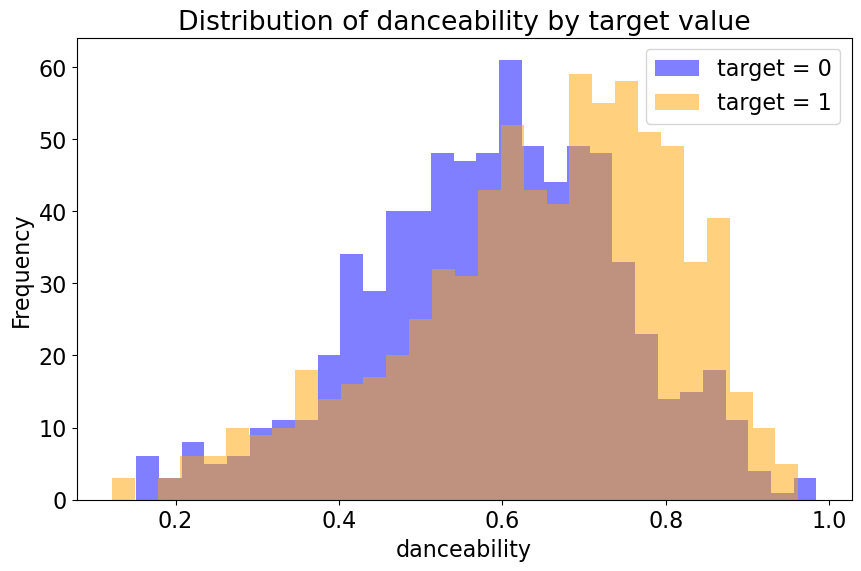

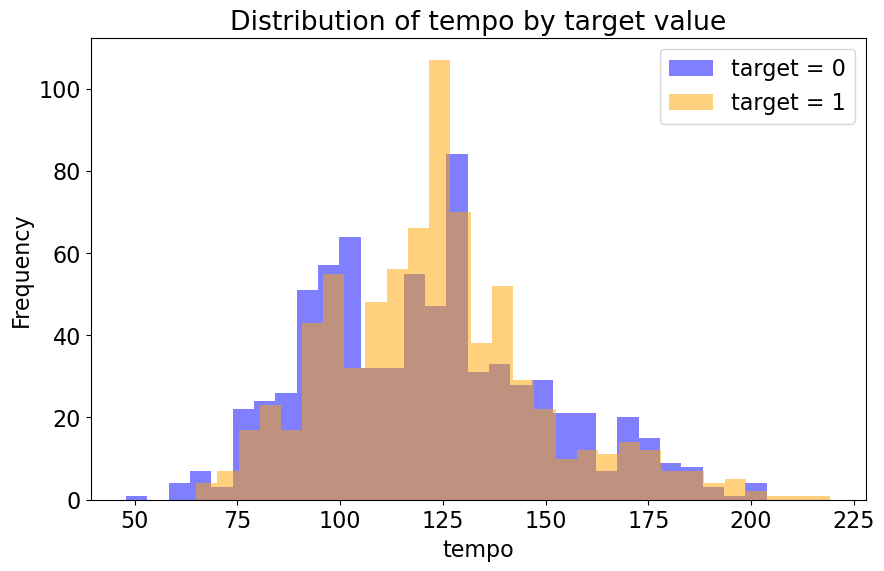

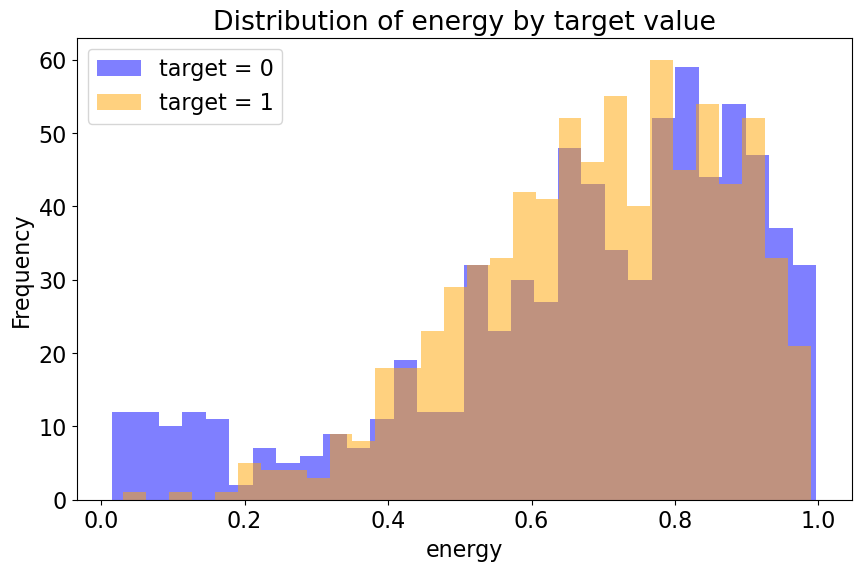

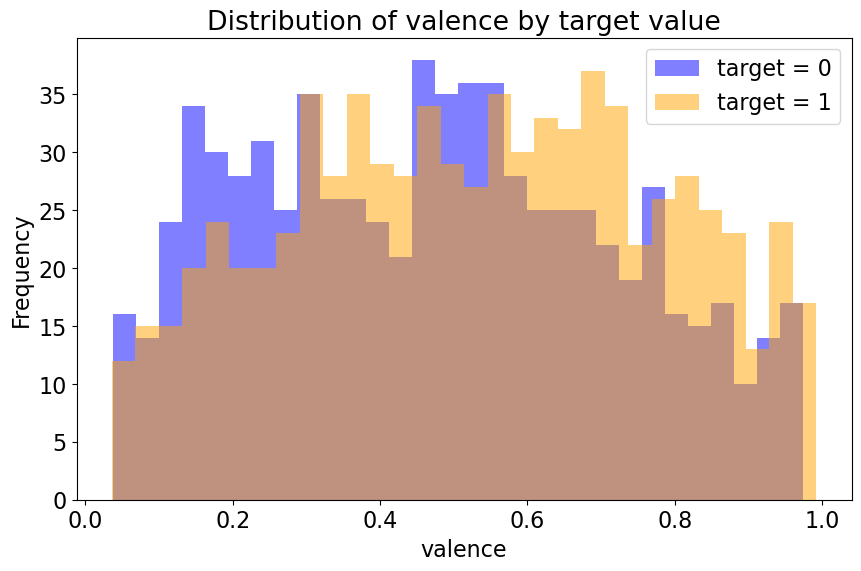

In [9]:
# Insert your code here
import matplotlib.pyplot as plt

features = ["danceability", "tempo", "energy", "valence"]

# Separate out positive and negative examples
negative_examples = df_train.query("target == 0")
positive_examples = df_train.query("target == 1")

for feature in features:
    plt.figure(figsize=(10,6)) # Setting the figure size
    # Plotting histogram for negative examples
    plt.hist(negative_examples[feature], bins=30, alpha=0.5, label="target = 0", color='blue')
    # Plotting histogram for positive examples
    plt.hist(positive_examples[feature], bins=30, alpha=0.5, label="target = 1", color='orange')
    
    # Adding title and labels
    plt.title(f"Distribution of {feature} by target value")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.legend()
    
    # Display the histogram
    plt.show()


#### 1(e)
rubric={points:4}

Let's say you had to make a decision stump (decision tree with depth 1), _by hand_, to predict the target class. Just from looking at the plots above, describe a reasonable split (feature name and threshold) and what class you would predict in the two cases. For example, in the loudness histogram provided earlier on, it seems that very large values of loudness are generally disliked (more blue on the right side of the histogram), so you might answer something like this: "A reasonable split would be to predict 0 if loudness > -5 (and predict 1 otherwise)."

Type your answer here:
For the danceability plot i noticed a differences in the values around 0.7. the songs that were greater than 0.7 on the scale were more well-liked. the songs with a danceability score lower than 0.7 were more likely to be disliked. 
A reasonable split would be to predict 1 if dancability is greater than 0.7 and predict 0 if its lower. 


#### 1(f)
rubric={points:2}

Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class?



Type your answer here:
No. The feature could still be useful for predicting the target class when looking at things such as distibution data. In this case you may not be analyzing the full supply of data and so this histogram could still help predict how that graph would look. 


#### 1(g) 
rubric={points:4}

Note that the dataset includes two free text features labeled `song_title` and `artist`:

In [10]:
df_train[["song_title", "artist"]].head()

,song_title,artist
1396,All in Vain,Mot
641,One of Those Nights,Juicy J
1765,Take Me As I Am,Wyclef Jean
1801,Save My Soul,JoJo
1624,Save the World - Radio Mix,Swedish House Mafia


- Do you think these features could be useful in predicting whether the user liked the song or not? 
- Would there be any difficulty in using them in your model?   

Type your answer here: 
Yes, I do think that these features coule be useful in predicting whether the user like the song or not. I think that it could be useful when trying to predict other songs a user might like. I think this because if a person likes one song from an artist the odds are that there will be another song from the same artist that the person will also like. 
Yes, there would be difficultly using them in my model. There may not be enough data for smaller artists, songs could have the same title and be confused within the data set, and text data need more pre-processing so a lot more steps would need to be added to do this. 


## Exercise 2: Using sklearn to build a decision tree classifier

Rubric={points:18}

#### 2(a) 
rubric={points:4}

- Create `X_train` and `y_train` and `X_test` and `y_test` from `df_train` and `df_test` above. Skip the `song_title` and `artist` features for now. 
- Fit a `DecisionTreeClassifier` on the train set.

In [11]:
# Insert your code here: 
X_train = df_train.drop(columns=['target', 'song_title', 'artist'])
y_train = df_train['target']

X_test = df_test.drop(columns=['target', 'song_title', 'artist'])
y_test = df_test['target']

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

#### 2(b)
rubric={points:2}

Use the `predict` method to predict the class of the first example in your `X_train`. Is the prediction correct? That is, does it match with the corresponding class in `y_train`?  

> Hint: you can grab the first example with `X_train.iloc[[0]]`.

In [12]:
# Insert your code here:
predicted_class = clf.predict(X_train.iloc[[0]])

is_correct = predicted_class[0] == y_train.iloc[0]

print(f"Predicted class: {predicted_class[0]}")
print(f"Actual class: {y_train.iloc[0]}")
print(f"Is the prediction correct? {is_correct}")

Predicted class: 0
Actual class: 0
Is the prediction correct? True


#### 2(c) 
rubric={points:2}

Use the `cross_val_score` function on your training set to compute the 10-fold cross-validation accuracy of your tree. 

In [13]:
# Insert your code here
scores = cross_val_score(clf, X_train, y_train, cv=10)

print(f"10-fold cross-validation accuracy: {scores.mean():.4f} +/- {scores.std():.4f}")

10-fold cross-validation accuracy: 0.6720 +/- 0.0193


#### 2(d)
rubric={points:6}

The above is useful, but we would like to see the training accuracy as well. 

- Compute the 10-fold cross-validation again but this time using the `cross_validate` function with `return_train_score=True`. 
- Print out both the cross-validation score and the training score.
- Is your cross-validation score exactly the same as what you got in the previous part? Very briefly discuss.

In [14]:
# Insert your code here
scores = cross_validate(clf, X_train, y_train, cv=10, return_train_score=True)

print(f"Average training accuracy: {scores['train_score'].mean():.4f} +/- {scores['train_score'].std():.4f}")
print(f"Average cross-validation accuracy: {scores['test_score'].mean():.4f} +/- {scores['test_score'].std():.4f}")

Average training accuracy: 0.9994 +/- 0.0003
Average cross-validation accuracy: 0.6812 +/- 0.0202


Type the answer of third question here:
NO, they are quite similar but they are not the exact same. I am predicting that they are different because of some small variations within the data.


#### 2(e)
rubric={points:2}

Do you see a significant difference between the training score and the cross-validation score? Briefly discuss.

Type your answer here:
Yes. There is a significant difference between the training and the cross-validation score. This could be because the model is too complex and it has some significant outliers that are being taken into account. 



#### 2(f)
rubric={points:2}

Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your cross validation score?

Type your answer here:
this informs the trustworthiness of the cross-validation score because they show consistency within the model and dataset. I clarifies that the model uses a consistent method when its determining things. It also shows a range within the sub-scores which provides reasoning for the range within the data. 

## Exercise 3: Hyperparameters 
rubric={points:32}

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

- Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with different values of `max_depth` (at least 10 different values in the range 1 to 25).{points:10}
- For each `max_depth`, get both the train accuracy and the cross-validation accuracy.{points:6}
- Make a plot with `max_depth` on the *x*-axis and the train and cross-validation scores on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which.{points:6}
- Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy. From these results, what depth would you pick as the optimal depth? {points:5}
- Do you think that the depth you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?{points:5}

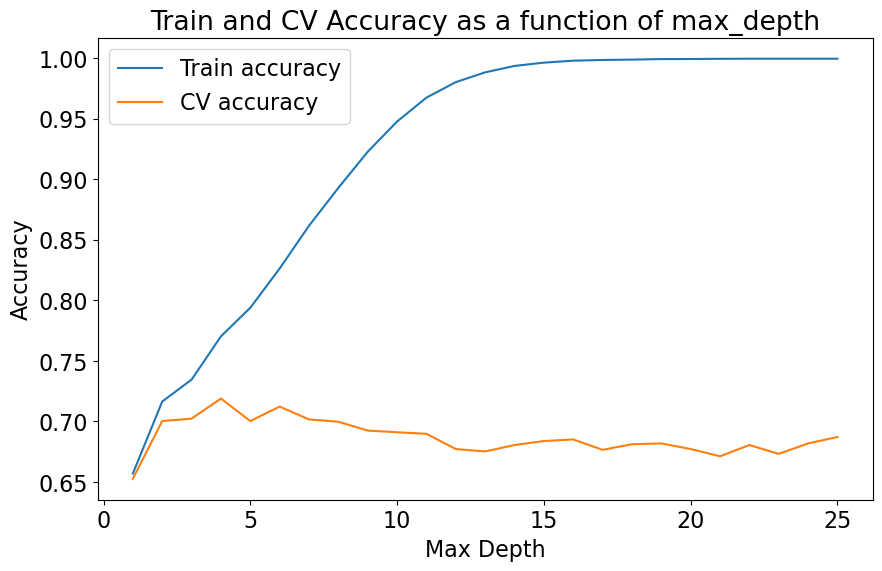

In [15]:
# Insert your code here
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
import numpy as np

depths = range(1, 26) 
train_scores = []
cv_scores = []

for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth)
    scores = cross_validate(tree, X_train, y_train, cv=10, return_train_score=True)
    train_scores.append(np.mean(scores['train_score']))
    cv_scores.append(np.mean(scores['test_score']))


plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, label='Train accuracy')
plt.plot(depths, cv_scores, label='CV accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Train and CV Accuracy as a function of max_depth')
plt.legend()
plt.show()
#print(train_scores)
#print(cv_scores)

Type your answer here:
the max depth hyperparameter affects the training and cross-validation because training accuracy goes up with an increase in the max_depth. However cross-validation accuracy goes up then plateus and drops. so you have to find the balance. I would pick yje optimat depth to be at 4 because that is where the CV is the most accurate. Second to that I would put it at 6 because it is almost the same as 4 but with a higher train. 
NO. I think that there is too much music out there to generalize it all based off of one data set. I think that this set could be used in some predictions but using it for all spotify predictions would be inaccurate. 


## Exercise 4: Test set
rubric={points:12}

Remember the test set you created way back at the beginning of this assignment? Let's use it now to see if our cross-validation score from the previous exercise is trustworthy. 

- Select your favorite `max_depth` from the previous part.
- Train a decision tree classifier using that `max_depth` on the _entire training set_.
- Compute and display the test score. 
- How does it compare to the cross-validation score from the previous exercise? Briefly discuss. 

In [16]:
# Insert your code here
clf = DecisionTreeClassifier(max_depth=4)

clf.fit(X_train, y_train)

test_score = clf.score(X_test, y_test)
print(f"Test score with max_depth=4: {test_score:.4f}")

Test score with max_depth=4: 0.7030


Type the answer of forth question here:
The test score is slightly lower than the score shown in the previous graph but not signinificantly different. This could be do to overfitting or that this test contains characteristics that the other did not. 


## Exercise 5: Conceptual questions
rubric={points:8}

Consider the dataset below, which has $6$ examples and $2$ features:

$$ X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}-1\\-1\\+1\\+1\\+1\\+1\end{bmatrix}.$$

1. Say we fit a decision stump (depth 1 decision tree) and the first split is on the first feature (left column) being less than 5.5. What would we predict in the "true" and "false" cases here?
2. What training accuracy would the above stump get on this data set?
3. Can we obtain 100% accuracy with a single decision stump in this particular example?

Type your answer here:

1. True: y=-1, False y=+1

2.83.33%

3.No, theres not another way to cleanly split the calses with a single split. 

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`.
2. Notebooks with cell execution numbers out of order will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Please keep your notebook clean and delete any throwaway code.